In [1]:
import torch

from reggae.data_loaders.datasets import P53Data
from reggae.gp.variational import SingleLinearLFM, ExponentialLFM
from reggae.gp.variational.trainer import TranscriptionalTrainer
from reggae.utilities import save, load
from reggae.plot.variational_plotters import Plotter

from matplotlib import pyplot as plt
import numpy as np

f64 = np.float64


torch.Size([5, 7])


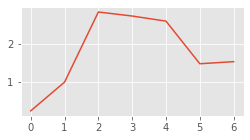

In [2]:
dataset = P53Data()

num_genes = len(dataset)

num_tfs = 1

t_inducing = torch.linspace(0, 1, 5, dtype=torch.float64).reshape((-1, 1))
t_observed = torch.linspace(0, 1, 7).view(-1)

m_observed = torch.stack([
    dataset[i][1] for i in range(num_genes)
])

plt.figure(figsize=(4, 2))
plt.plot(dataset[0][1])

In [3]:
#ExponentialLFM
model = SingleLinearLFM(num_genes, num_tfs,
                        t_inducing, dataset, extra_points=2,
                        fixed_variance=dataset.variance)
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
trainer = TranscriptionalTrainer(model, optimizer, dataset, batch_size=5)

C:\Users\Jacob\Documents\proj\reggae\reggae\gp\variational\models.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.inducing_inputs = Parameter(torch.tensor(t_inducing), requires_grad=False)


### Outputs prior to training:

C:\Users\Jacob\Documents\proj\reggae\reggae\plot\variational_plotters.py:99: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(plotnum)


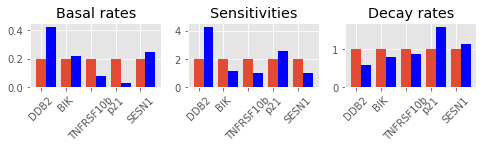

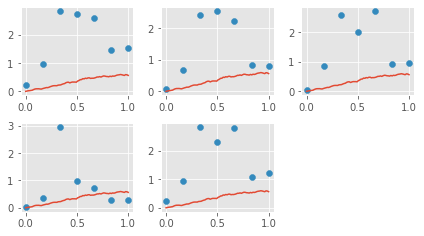

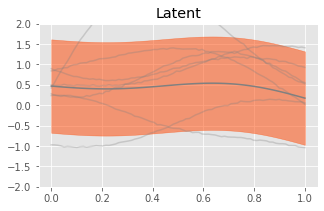

In [4]:
plotter = Plotter(model, dataset.gene_names, t_inducing)
plotter.plot_kinetics()

t_predict = torch.linspace(f64(0), f64(1), 80, dtype=torch.float64)

rtol = 1e-3
atol = rtol/10

model_kwargs = {
    'rtol': rtol, 'atol': atol,
    'num_samples': 1
}

plotter.plot_outputs(t_predict, t_scatter=t_observed,y_scatter=m_observed, model_kwargs=model_kwargs)
plotter.plot_latents(t_predict)

In [ ]:
tol = 1e-3
import time
start = time.time()

output = trainer.train(50, rtol=tol, atol=tol/10,
                       report_interval=5, plot_interval=5, num_samples=1)
end = time.time()
print(end - start)

Epoch 1/50 - Loss: 49.45 (49.45 0.00) λ: 0.070  b: 1.18 d 1.99 s: 2.97
Epoch 6/50 - Loss: 138.03 (131.51 6.52) λ: 0.090  b: 1.50 d 1.68 s: 3.27
Epoch 11/50 - Loss: 97.81 (88.93 8.88) λ: 0.074  b: 1.45 d 1.78 s: 3.09
Epoch 16/50 - Loss: 95.06 (89.15 5.91) λ: 0.059  b: 1.46 d 1.80 s: 3.00
Epoch 21/50 - Loss: 110.31 (105.37 4.94) λ: 0.051  b: 1.59 d 1.71 s: 3.03
Epoch 26/50 - Loss: 99.48 (95.09 4.39) λ: 0.047  b: 1.61 d 1.71 s: 2.98
Epoch 31/50 - Loss: 71.31 (67.19 4.12) λ: 0.045  b: 1.58 d 1.76 s: 2.93
Epoch 36/50 - Loss: 59.85 (55.55 4.30) λ: 0.048  b: 1.63 d 1.72 s: 2.96


### Outputs after training

C:\Users\Jacob\Documents\proj\reggae\reggae\plot\variational_plotters.py:99: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(plotnum)


IndexError: too many indices for array: array is 1-dimensional, but 3 were indexed

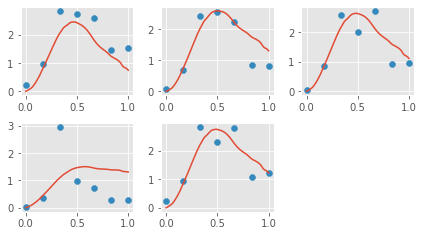

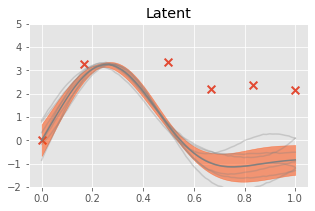

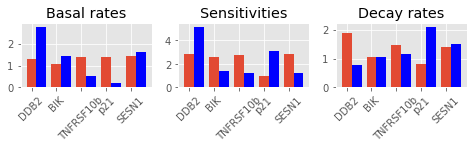

In [10]:
tol = 1e-6
# plotter = Plotter(model, dataset.gene_names, t_inducing)

# plot_losses(trainer)
plotter.plot_outputs(t_predict, t_scatter=t_observed,y_scatter=m_observed, model_kwargs=model_kwargs)
plotter.plot_latents(t_predict, ylim=(-2, 5), plot_barenco=True, plot_inducing=False)
plotter.plot_kinetics()
plotter.plot_convergence(trainer)

In [8]:
save(model, 'variational_linear')

In [9]:
model = load('variational_linear', SingleLinearLFM, num_genes, num_tfs,
             t_inducing, dataset, extra_points=2, fixed_variance=dataset.variance)

optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
trainer = TranscriptionalTrainer(model, optimizer, dataset, batch_size=5)

C:\Users\Jacob\Documents\proj\reggae\reggae\gp\variational\models.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.inducing_inputs = Parameter(torch.tensor(t_inducing), requires_grad=False)
